TensorFlow -> Google
PyTorch -> Meta

In [ ]:
!pip install tensorflow

  Using cached protobuf-4.23.4-cp310-abi3-win_amd64.whl.metadata (540 bytes)
Using cached protobuf-4.23.4-cp310-abi3-win_amd64.whl (422 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.71.2 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.23.4 which is incompatible.
tensorflow-metadata 1.16.1 requires protobuf<6.0.0dev,>=4.25.2; python_version >= "3.11", but you have protobuf 4.23.4 which is incompatible.


In [2]:
import tensorflow as tf
from tensorflow.keras import layers,models
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# tf.keras.datasets.mnist.load_data()
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 22s 2us/step


In [4]:
x_train[0]
# 0 => black 255 => white

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]

5

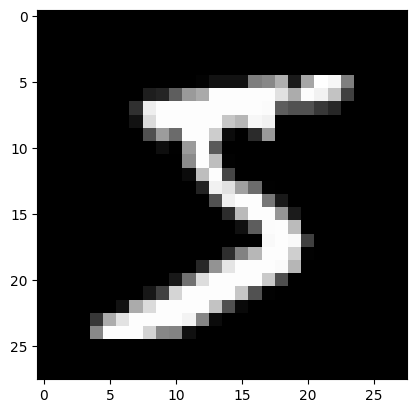

In [6]:
plt.imshow(x_train[0],cmap='grey')

In [7]:
x_train,x_test = x_train/255.0,x_test/255.0

In [8]:
model = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
history = model.fit(x_train,y_train,epochs=10)

Epoch 1/10


1875/1875 [==============================] - 17s 8ms/step - loss: 0.2613 - accuracy: 0.9255
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1141 - accuracy: 0.9659
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0790 - accuracy: 0.9764
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0591 - accuracy: 0.9817
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0453 - accuracy: 0.9862
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0363 - accuracy: 0.9887
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0288 - accuracy: 0.9910
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0240 - accuracy: 0.9922
Epoch 9/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0192 - accuracy: 0.9945
Epoch 10/10
1875/1875 [==============================] - 14s 8ms/step -

In [12]:
test_loss,test_accuracy = model.evaluate(x_test,y_test)
print(f'Test Accuracy: {test_accuracy*100:2f}%')

313/313 [==============================] - 2s 5ms/step - loss: 0.0824 - accuracy: 0.9783
Test Accuracy: 97.829998%


In [13]:
predictions = model.predict(x_test)
print(predictions)

print('Predictions Shape - ', predictions.shape)

313/313 [==============================] - 2s 5ms/step
[[6.35994646e-10 2.41716203e-09 2.90837505e-07 ... 9.99978781e-01
  1.64511038e-09 1.60183970e-06]
 [5.66644613e-11 9.00630015e-10 1.00000000e+00 ... 2.94940578e-16
  1.09028370e-10 1.36379303e-20]
 [1.88701388e-10 9.99994755e-01 2.25946837e-06 ... 2.12075702e-06
  8.23395567e-07 1.14637140e-10]
 ...
 [1.42971293e-18 8.58610817e-13 4.65845675e-16 ... 1.53732196e-06
  5.40203837e-09 2.37391805e-06]
 [1.83155210e-11 1.08021437e-12 3.52001739e-13 ... 2.77809595e-13
  1.82531927e-08 3.08380159e-16]
 [5.86331761e-10 1.37848946e-14 1.63548783e-08 ... 8.63741747e-18
  1.03673729e-13 7.65564532e-13]]
Predictions Shape -  (10000, 10)


In [14]:
predictions[0]

array([6.3599465e-10, 2.4171620e-09, 2.9083751e-07, 1.9479969e-05,
       4.6060173e-17, 3.5997098e-11, 1.0674271e-17, 9.9997878e-01,
       1.6451104e-09, 1.6018397e-06], dtype=float32)

In [15]:
print(np.argmax(predictions[0]))

7


In [16]:
print(y_test[0])

7


Text(0.5, 1.0, 'True Label: 7 ')

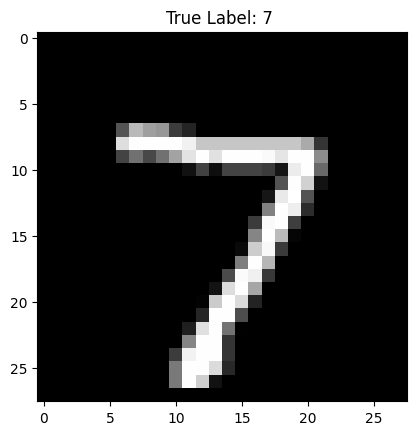

In [17]:
plt.imshow(x_test[0],cmap='grey')
plt.title(f"True Label: {y_test[0]} ")

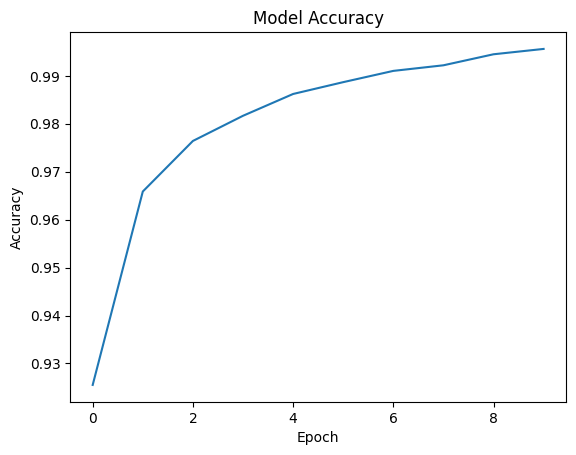

In [18]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

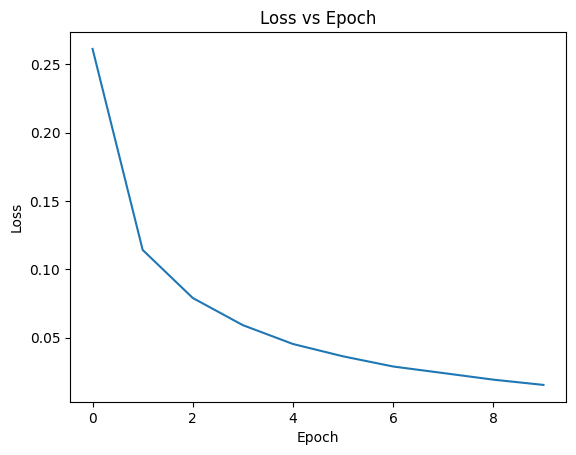

In [19]:
plt.plot(history.history['loss'])
plt.title('Loss vs Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()